# <div align="center">MIS-637 Final Project_NYC Culinary Success Predictor

# CRISP-DM Phase 2: Data Understanding 

In [62]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import dataset
df_kayak = pd.read_csv('kayak_data.csv')

# Check basic info of the dataset
df_kayak.info()

# Display the first few rows of the dataset and the column names to understand its structure
df_kayak.head()
df_kayak.columns


# Imputing the value of 'overall_rating' to check if it is calculated by the sub ratings
ratings_data = df_kayak.copy() 

# Calculate the mean of food, service, and ambiance ratings for each restaurant again (ensuring no warnings)
ratings_data['calculated_mean'] = ratings_data[['food', 'service', 'ambiance']].mean(axis=1)

# Adding the restaurant name for better understanding of the output
ratings_data['name'] = df_kayak['name']

# Displaying the restaurant name, their overall rating, and the calculated mean of food, service, and ambiance
ratings_display = ratings_data[['name', 'overall_rating', 'calculated_mean']]
ratings_display.head(10)  # Displaying the first 10 entries for brevity


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               943 non-null    object 
 1   name              943 non-null    object 
 2   locality          936 non-null    object 
 3   cuisine           943 non-null    object 
 4   price_per_person  943 non-null    object 
 5   overall_rating    941 non-null    float64
 6   food              943 non-null    float64
 7   service           943 non-null    float64
 8   ambiance          943 non-null    float64
 9   reviews           941 non-null    float64
 10  noise             941 non-null    object 
 11  dining_style      943 non-null    object 
dtypes: float64(5), object(7)
memory usage: 88.5+ KB


,name,overall_rating,calculated_mean
0,Le Midi Bar & Restaurant,4.5,4.433333
1,Malai Marke,4.4,4.266667
2,The Flatiron Room - Nomad,4.5,4.466667
3,Bocca Di Bacco (Chelsea - 20th St.),4.4,4.433333
4,Banc Cafe,4.6,4.400000
5,BXL ZOUTE,4.6,4.566667
6,Gallow Green,4.3,4.366667
7,Strip House Speakeasy,4.9,4.833333
8,Pasta Lovers Trattoria,4.6,4.566667
9,Cocotte,4.8,4.733333


## Exploratory Data Analysis

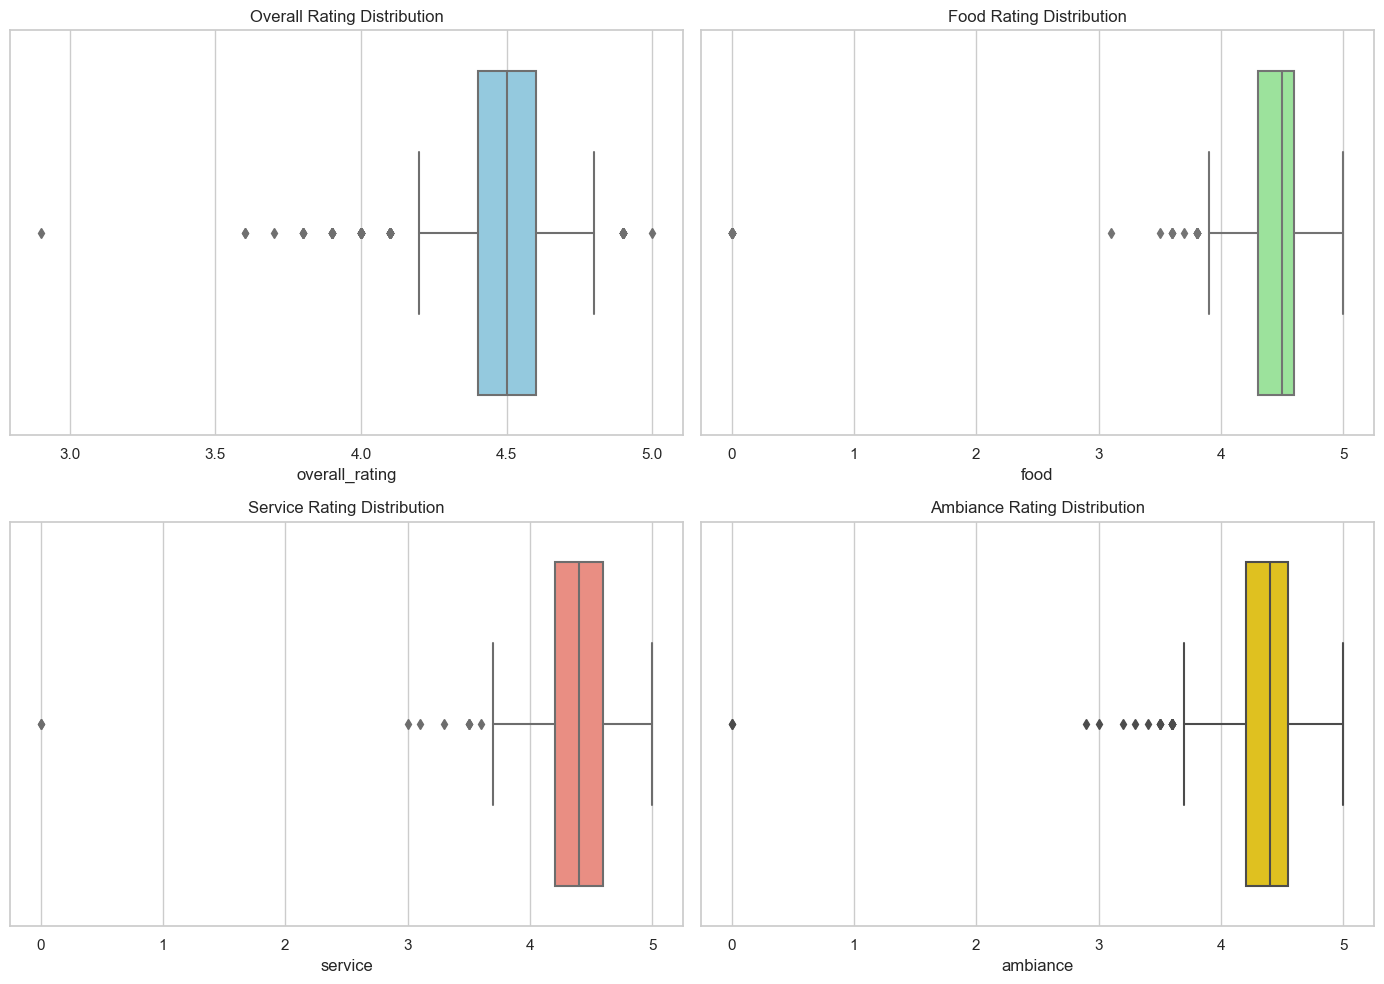

In [63]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Plot for 4 sub rating distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
sns.boxplot(ax=axes[0, 0], data=df_kayak, x='overall_rating', color='skyblue')
axes[0, 0].set_title('Overall Rating Distribution')

sns.boxplot(ax=axes[0, 1], data=df_kayak, x='food', color='lightgreen')
axes[0, 1].set_title('Food Rating Distribution')

sns.boxplot(ax=axes[1, 0], data=df_kayak, x='service', color='salmon')
axes[1, 0].set_title('Service Rating Distribution')

sns.boxplot(ax=axes[1, 1], data=df_kayak, x='ambiance', color='gold')
axes[1, 1].set_title('Ambiance Rating Distribution')

plt.tight_layout()
plt.show()

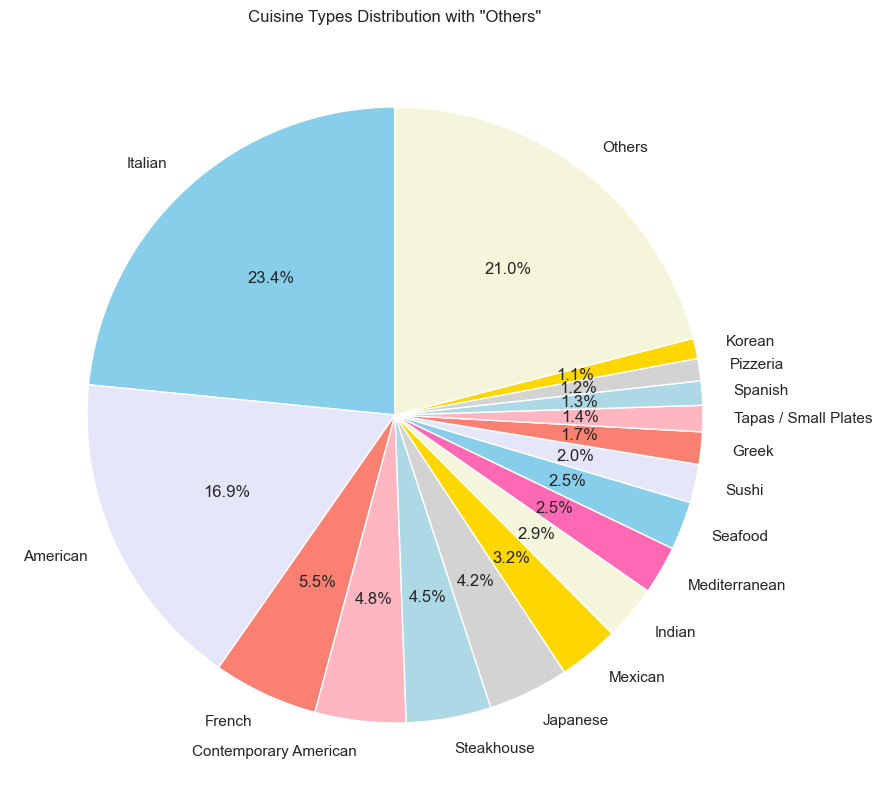

In [64]:
import matplotlib.pyplot as plt


# Calculate cuisine counts and their respective percentages
cuisine_counts = df_kayak['cuisine'].value_counts(normalize=True) * 100

# Combine smaller categories into 'Others'
other_cuisines = cuisine_counts[cuisine_counts < 1.0]
cuisine_counts = cuisine_counts[cuisine_counts >= 1.0]
cuisine_counts['Others'] = other_cuisines.sum()



# Define your custom colors as a list
custom_colors = ['skyblue', 'lavender', 'salmon', 'lightpink', 'lightblue', 
                 'lightgray', 'gold', 'beige', 'hotpink', 'skyblue', 
                 'lavender', 'salmon', 'lightpink', 'lightblue', 'lightgray', 
                 'gold', 'beige']

# Plot with custom colors
plt.figure(figsize=(20, 10))
cuisine_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=custom_colors)
plt.ylabel('')
plt.title('Cuisine Types Distribution with "Others"')

# Save the plot to a file
plt.savefig('cuisine_distribution_plot.png')

# Show the plot
plt.show()


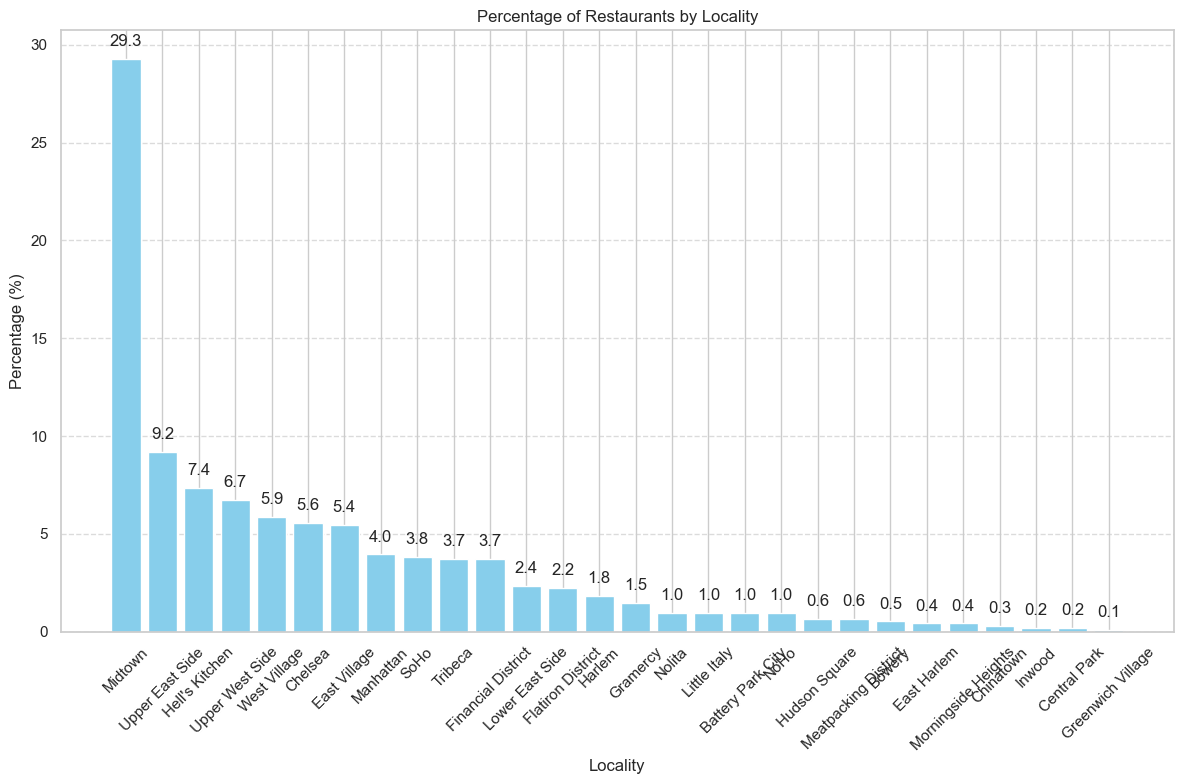

In [65]:
import matplotlib.pyplot as plt

# Calculate the percentage for each locality
locality_percentages = df_kayak['locality'].value_counts(normalize=True) * 100
locality_percentages.sort_values(ascending=False, inplace=True)

# Plot the bar chart
plt.figure(figsize=(12, 8))
bars = plt.bar(locality_percentages.index, locality_percentages.values, color='skyblue')
plt.title('Percentage of Restaurants by Locality')
plt.xlabel('Locality')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)

# Adding data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval, 1), ha='center', va='bottom')

# Adding grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()

# Save the plot to a file
plt.savefig('improved_locality_distribution_bar_chart.png')

plt.show()


# CRISP-DM Phase 3: Data Preparation

## Step 1: Data Cleaning

In [66]:
# Drop irrelevant columns
df_kayak = df_kayak.drop(['url','reviews'],axis=1)

df_kayak.head()

,name,locality,cuisine,price_per_person,overall_rating,food,service,ambiance,noise,dining_style
0,Le Midi Bar & Restaurant,Manhattan,French,$31 to $50,4.5,4.5,4.5,4.3,Moderate,Casual Dining
1,Malai Marke,East Village,Indian,$30 and under,4.4,4.6,4.3,3.9,Moderate,Casual Dining
2,The Flatiron Room - Nomad,Midtown,American,$31 to $50,4.5,4.2,4.4,4.8,Moderate,Casual Elegant
3,Bocca Di Bacco (Chelsea - 20th St.),Chelsea,Italian,$30 and under,4.4,4.5,4.4,4.4,Moderate,Casual Dining
4,Banc Cafe,Midtown,Contemporary American,$30 and under,4.6,4.4,4.4,4.4,Moderate,Casual Dining


In [67]:
# Check the number of unique values in each column
df_kayak.nunique()

name                943
locality             28
cuisine              96
price_per_person      3
overall_rating       16
food                 18
service              20
ambiance             22
noise                 2
dining_style          5
dtype: int64

In [68]:
# Check the number of missing values in each column
df_kayak.isna().sum()

name                0
locality            7
cuisine             0
price_per_person    0
overall_rating      2
food                0
service             0
ambiance            0
noise               2
dining_style        0
dtype: int64

In [69]:
# Removing rows with any missing values
df_kayak_cleaned = df_kayak.dropna()

df_kayak_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
Index: 934 entries, 0 to 941
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              934 non-null    object 
 1   locality          934 non-null    object 
 2   cuisine           934 non-null    object 
 3   price_per_person  934 non-null    object 
 4   overall_rating    934 non-null    float64
 5   food              934 non-null    float64
 6   service           934 non-null    float64
 7   ambiance          934 non-null    float64
 8   noise             934 non-null    object 
 9   dining_style      934 non-null    object 
dtypes: float64(4), object(6)
memory usage: 80.3+ KB


In [70]:
df_kayak_cleaned.head()

,name,locality,cuisine,price_per_person,overall_rating,food,service,ambiance,noise,dining_style
0,Le Midi Bar & Restaurant,Manhattan,French,$31 to $50,4.5,4.5,4.5,4.3,Moderate,Casual Dining
1,Malai Marke,East Village,Indian,$30 and under,4.4,4.6,4.3,3.9,Moderate,Casual Dining
2,The Flatiron Room - Nomad,Midtown,American,$31 to $50,4.5,4.2,4.4,4.8,Moderate,Casual Elegant
3,Bocca Di Bacco (Chelsea - 20th St.),Chelsea,Italian,$30 and under,4.4,4.5,4.4,4.4,Moderate,Casual Dining
4,Banc Cafe,Midtown,Contemporary American,$30 and under,4.6,4.4,4.4,4.4,Moderate,Casual Dining


## Step 2: Data Preprocessing

In [71]:
from sklearn.preprocessing import OneHotEncoder

# Making a copy of the original cleaned DataFrame to preserve it
df_kayak_cleaned_copy = df_kayak_cleaned.copy()

# Text Columns to be one-hot encoded
columns_to_encode = ['locality', 'cuisine', 'price_per_person','noise', 'dining_style']

# Creating the encoder
encoder = OneHotEncoder(sparse=False, drop='first')  # `drop='first'` to avoid dummy variable trap

# Fitting and transforming the columns to encode, and creating a new DataFrame with these
encoded_features = encoder.fit_transform(df_kayak_cleaned_copy[columns_to_encode])

# Getting the new feature names after one-hot encoding
encoded_features_names = encoder.get_feature_names_out(columns_to_encode)

# Creating a DataFrame with the encoded features
df_encoded_features = pd.DataFrame(encoded_features, columns=encoded_features_names)

# Resetting index on the copied DataFrame to ensure concatenation works correctly if indexes are not aligned
df_kayak_cleaned_copy.reset_index(drop=True, inplace=True)

# Concatenating the encoded features back with the copied DataFrame (excluding the original columns to encode)
df_prepared = pd.concat([df_kayak_cleaned_copy.drop(columns=columns_to_encode), df_encoded_features], axis=1)

print(df_prepared.head())

                                  name  overall_rating  food  service  \
0             Le Midi Bar & Restaurant             4.5   4.5      4.5   
1                          Malai Marke             4.4   4.6      4.3   
2            The Flatiron Room - Nomad             4.5   4.2      4.4   
3  Bocca Di Bacco (Chelsea - 20th St.)             4.4   4.5      4.4   
4                            Banc Cafe             4.6   4.4      4.4   

   ambiance  locality_Bowery  locality_Central Park  locality_Chelsea  \
0       4.3              0.0                    0.0               0.0   
1       3.9              0.0                    0.0               0.0   
2       4.8              0.0                    0.0               0.0   
3       4.4              0.0                    0.0               1.0   
4       4.4              0.0                    0.0               0.0   

   locality_Chinatown  locality_East Harlem  ...  cuisine_Vegetarian / Vegan  \
0                 0.0                   0.

In [72]:
# Transforming the target variable to categorical variable
# Defining the bins and labels as Low (0-3.5), Medium (3.5-4.5), and High (4.5-5)
bins = [0, 3.5, 4.5, 5] 
labels = ['Low', 'Medium', 'High']

# Binning the 'overall_rating' into categories
df_prepared['overall_rating_category'] = pd.cut(df_prepared['overall_rating'], bins=bins, labels=labels, include_lowest=True)

# Displaying the first few rows to verify the new column
print(df_prepared[['overall_rating', 'overall_rating_category']].head())


   overall_rating overall_rating_category
0             4.5                  Medium
1             4.4                  Medium
2             4.5                  Medium
3             4.4                  Medium
4             4.6                    High


In [73]:
# Encode the numerical attributes(food, service, ambiance rating) as categorical attributes

# Defining the bins and corresponding labels
bins = [0, 3.5, 4.5, 5]
labels = [0, 1, 2]  # Represent the categories as numeric codes 0, 1, 2

# Applying the binning to each column
df_prepared['food_cat'] = pd.cut(df_prepared['food'], bins=bins, labels=labels, include_lowest=True)
df_prepared['service_cat'] = pd.cut(df_prepared['service'], bins=bins, labels=labels, include_lowest=True)
df_prepared['ambiance_cat'] = pd.cut(df_prepared['ambiance'], bins=bins, labels=labels, include_lowest=True)

# Displaying the first few rows to verify the new columns
print(df_prepared[['food', 'food_cat', 'service', 'service_cat', 'ambiance', 'ambiance_cat']].head())


   food food_cat  service service_cat  ambiance ambiance_cat
0   4.5        1      4.5           1       4.3            1
1   4.6        2      4.3           1       3.9            1
2   4.2        1      4.4           1       4.8            2
3   4.5        1      4.4           1       4.4            1
4   4.4        1      4.4           1       4.4            1


In [74]:
# Check the final prepared data
df_prepared.info()
df_prepared.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Columns: 138 entries, name to ambiance_cat
dtypes: category(4), float64(133), object(1)
memory usage: 982.1+ KB


,name,overall_rating,food,service,ambiance,locality_Bowery,locality_Central Park,locality_Chelsea,locality_Chinatown,locality_East Harlem,...,price_per_person_$50 and over,noise_Moderate,dining_style_Casual Elegant,dining_style_Elegant Dining,dining_style_Fine Dining,dining_style_Home Style,overall_rating_category,food_cat,service_cat,ambiance_cat
0,Le Midi Bar & Restaurant,4.5,4.5,4.5,4.3,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,Medium,1,1,1
1,Malai Marke,4.4,4.6,4.3,3.9,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,Medium,2,1,1
2,The Flatiron Room - Nomad,4.5,4.2,4.4,4.8,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,Medium,1,1,2
3,Bocca Di Bacco (Chelsea - 20th St.),4.4,4.5,4.4,4.4,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,Medium,1,1,1
4,Banc Cafe,4.6,4.4,4.4,4.4,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,High,1,1,1


# CRISP-DM Phase 4: Modeling

## K-Nearest Neighbors (KNN) Classifier
Uses the scikit-learn library to train and evaluate a K-Nearest Neighbors (KNN) classifier.

### Initial Model

In [75]:
# Importing necessary libraries for data splitting, KNN classification, performance evaluation, and data scaling.
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

# Selecting numeric features from the DataFrame while excluding target variables.
numeric_features = [col for col in df_prepared.select_dtypes(include=['int64', 'float64']).columns if col not in ['overall_rating', 'overall_rating_category']]


# Defining feature set (X) and target variable (y).
X = df_prepared[numeric_features]
y = df_prepared['overall_rating_category']  

# Splitting the dataset into training and testing sets, with 30% of the data reserved as the test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) 

# Initializing a scaler object and scaling the numeric features to have zero mean and unit variance.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initializing the KNN classifier with 5 neighbors.
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [76]:
# Predicting the target for the test set.
y_pred = knn.predict(X_test_scaled)

# Printing the confusion matrix to evaluate the accuracy of a classification.
print(confusion_matrix(y_test, y_pred))

# Printing a report showing the main classification metrics (precision, recall, f1-score, support).
print(classification_report(y_test, y_pred))

[[ 70  57]
 [ 45 109]]
              precision    recall  f1-score   support

        High       0.61      0.55      0.58       127
      Medium       0.66      0.71      0.68       154

    accuracy                           0.64       281
   macro avg       0.63      0.63      0.63       281
weighted avg       0.63      0.64      0.63       281



### 2nd Attempt
Utilizes scikit-learn's GridSearchCV to optimize the hyperparameters of a K-Nearest Neighbors (KNN) classifier.

In [77]:
# Optimized method
# Importing necessary library for grid search
from sklearn.model_selection import GridSearchCV

# Using previously defined 'numeric_features' to select features and target from the prepared DataFrame
X = df_prepared[numeric_features]
y = df_prepared['overall_rating_category']

# Splitting the dataset into training (70%) and testing (30%) sets, with a fixed random state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardizing features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit to training data, then transform it
X_test_scaled = scaler.transform(X_test)        # Apply same transformation to test data

# Defining the range of 'k' values to be tested
k_range = list(range(1, 21))
param_grid = dict(n_neighbors=k_range)

# Initializing the KNeighborsClassifier
knn = KNeighborsClassifier()

# Setting up GridSearchCV with the KNN classifier, specifying the parameter grid, number of folds for cross-validation, and scoring method
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')

# Fitting the GridSearchCV to the scaled training data to find the best parameters
grid.fit(X_train_scaled, y_train)

# Outputting the best number of neighbors and the corresponding accuracy score
print('Best K Value:', grid.best_params_)
print('Best Score:', grid.best_score_)

# Using the best estimator found by GridSearchCV to make predictions on the scaled test data
best_knn = grid.best_estimator_
y_pred = best_knn.predict(X_test_scaled)

# Printing the confusion matrix to evaluate the accuracy of the classification
print(confusion_matrix(y_test, y_pred))


# Printing a classification report that includes main classification metrics like precision, recall, and F1-score
print(classification_report(y_test, y_pred))


Best K Value: {'n_neighbors': 17}
Best Score: 0.7396736596736597
[[ 74  53]
 [ 37 117]]
              precision    recall  f1-score   support

        High       0.67      0.58      0.62       127
      Medium       0.69      0.76      0.72       154

    accuracy                           0.68       281
   macro avg       0.68      0.67      0.67       281
weighted avg       0.68      0.68      0.68       281



## Decision Tree Classifier

Uses the scikit-learn library to train and evaluate a Decision Tree classifier.

### Initial Model (Gini Impurity)

In [78]:
from sklearn.tree import DecisionTreeClassifier

# Creating the feature matrix X by selecting all columns except the target label 'overall_rating_category'
X = df_prepared.drop(['name','overall_rating', 'overall_rating_category', 'food', 'service', 'ambiance'], axis=1)

# Creating the target vector y from the 'overall_rating_category' column
y = df_prepared['overall_rating_category']

# Displaying the first few rows of X to verify
print(X.head())

# Displaying the first few entries of y to verify
print(y.head())

# Split training-testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 11)

# Create a DecisionTreeClassifier model with Gini Impurity
dt1 = DecisionTreeClassifier(criterion='gini',random_state = 36)

# Fit decision tree with the training data
dt1.fit(X_train, y_train)


   locality_Bowery  locality_Central Park  locality_Chelsea  \
0              0.0                    0.0               0.0   
1              0.0                    0.0               0.0   
2              0.0                    0.0               0.0   
3              0.0                    0.0               1.0   
4              0.0                    0.0               0.0   

   locality_Chinatown  locality_East Harlem  locality_East Village  \
0                 0.0                   0.0                    0.0   
1                 0.0                   0.0                    1.0   
2                 0.0                   0.0                    0.0   
3                 0.0                   0.0                    0.0   
4                 0.0                   0.0                    0.0   

   locality_Financial District  locality_Flatiron District  locality_Gramercy  \
0                          0.0                         0.0                0.0   
1                          0.0        

DecisionTreeClassifier(random_state=36)

In [79]:
# Evaluate model performance
from sklearn.metrics import confusion_matrix, classification_report

# Calculating training accuracy
training_accuracy = dt1.score(X_train, y_train)
print(f"Training Accuracy: {training_accuracy:.4f}")

# Calculating testing accuracy
testing_accuracy = dt1.score(X_test, y_test)
print(f"Testing Accuracy: {testing_accuracy:.4f}")

# Printing the classification report

y_pred = dt1.predict(X_test)

print(classification_report(y_test, y_pred))

Training Accuracy: 0.9813
Testing Accuracy: 0.8503
              precision    recall  f1-score   support

        High       0.80      0.84      0.82        76
      Medium       0.89      0.86      0.87       111

    accuracy                           0.85       187
   macro avg       0.84      0.85      0.85       187
weighted avg       0.85      0.85      0.85       187



Classes as recognized by the model: ['High' 'Low' 'Medium']


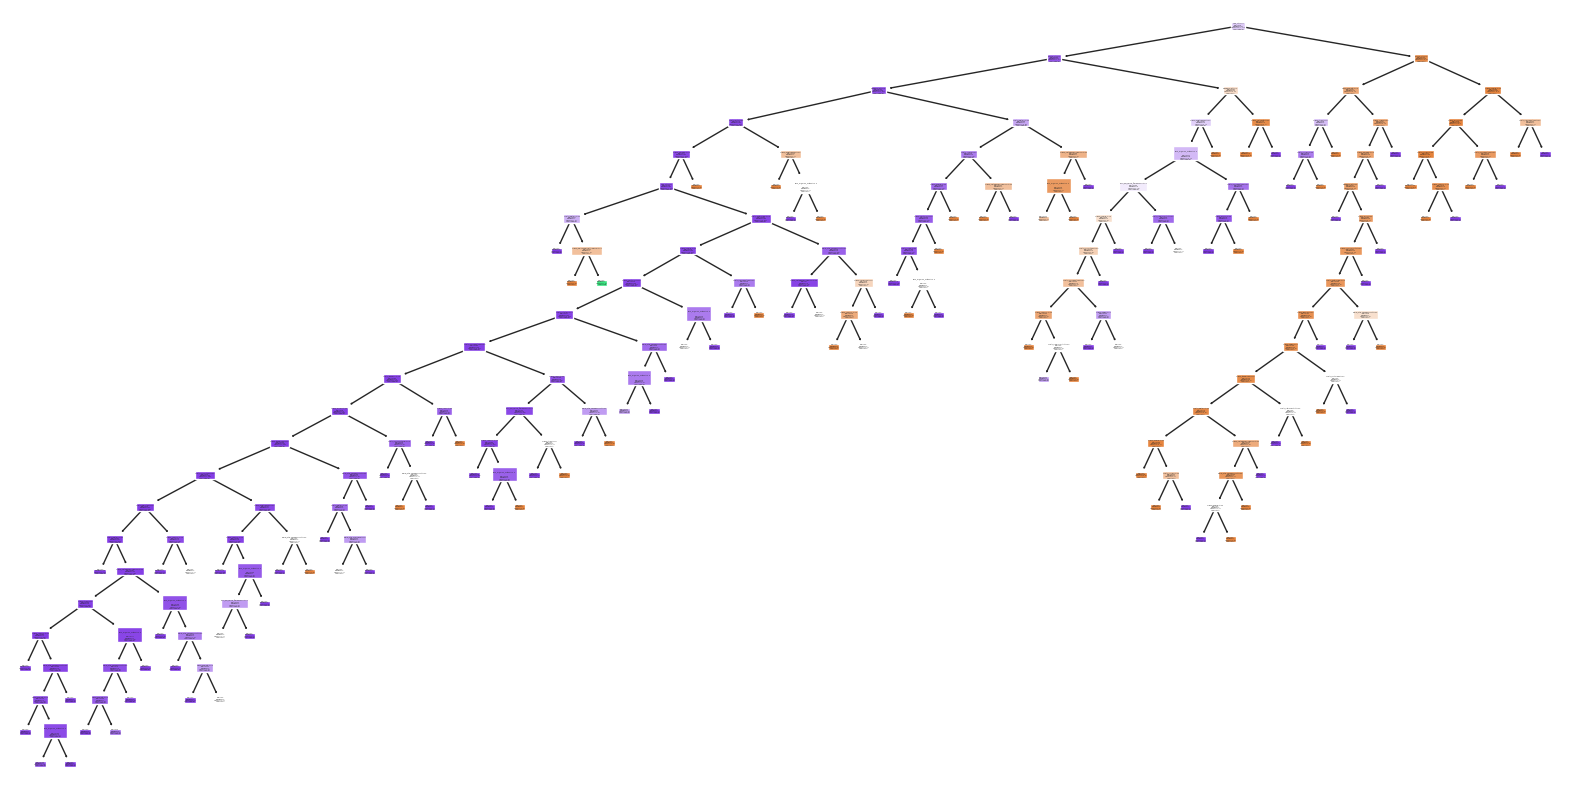

In [80]:
# Visualizing the decision tree

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Extracting feature names from the DataFrame
feature_names = df_prepared.drop(['name', 'overall_rating', 'overall_rating_category', 'food', 'service', 'ambiance'], axis=1).columns


# Manually specifying the class names to ensure correct order and alignment(needs to align with print(dt1.classes_))
# check the order of classes as recognized by the model and ensure class_names array matches it
print("Classes as recognized by the model:", dt1.classes_)
class_names = ['High','Low', 'Medium']

# Plot the tree
plt.figure(figsize=(20,10))  # Set the figure size (width, height) for better readability
plot_tree(dt1, feature_names=feature_names, class_names=class_names, filled=True)

plt.savefig('dt_m1.pdf', format='pdf', bbox_inches='tight')
plt.show()


In [81]:
#  Use the decision_path Method to understand the decision rule
from sklearn.tree import DecisionTreeClassifier, export_text

# dt1 is the fitted DecisionTreeClassifier and X_test is the test dataset

# Get the decision path of the first five samples
decision_paths = dt1.decision_path(X_test.iloc[:5])

# Print the decision paths
for i, path in enumerate(decision_paths):
    print(f"Sample {i + 1} - Feature indices in the path:", path.indices)


Sample 1 - Feature indices in the path: [  0 164 208 209 210 211]
Sample 2 - Feature indices in the path: [ 0  1  2  3  4  5 11 12 13 14 15 16 17 18 19 20 21 22]
Sample 3 - Feature indices in the path: [  0 164 208 209 210 211]
Sample 4 - Feature indices in the path: [  0 164 208 209 210 211]
Sample 5 - Feature indices in the path: [0 1 2 3 4 5 6 8 9]


In [82]:
# Visualize the Paths in Terms of Rules

# Convert the tree to a text representation
tree_rules = export_text(dt1, feature_names=list(X.columns))

# Printing the tree rules can help correlate the paths to actual conditions
print(tree_rules)


|--- food_cat <= 1.50
|   |--- service_cat <= 1.50
|   |   |--- ambiance_cat <= 1.50
|   |   |   |--- locality_Nolita <= 0.50
|   |   |   |   |--- cuisine_Georgian <= 0.50
|   |   |   |   |   |--- food_cat <= 0.50
|   |   |   |   |   |   |--- locality_Midtown <= 0.50
|   |   |   |   |   |   |   |--- class: Medium
|   |   |   |   |   |   |--- locality_Midtown >  0.50
|   |   |   |   |   |   |   |--- cuisine_Bar / Lounge / Bottle Service <= 0.50
|   |   |   |   |   |   |   |   |--- class: High
|   |   |   |   |   |   |   |--- cuisine_Bar / Lounge / Bottle Service >  0.50
|   |   |   |   |   |   |   |   |--- class: Low
|   |   |   |   |   |--- food_cat >  0.50
|   |   |   |   |   |   |--- locality_West Village <= 0.50
|   |   |   |   |   |   |   |--- cuisine_Pizzeria <= 0.50
|   |   |   |   |   |   |   |   |--- cuisine_Cocktail bar <= 0.50
|   |   |   |   |   |   |   |   |   |--- locality_Little Italy <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- locality_Upper East Side <= 0.50
| 

### 2nd Attempt
Utilizes scikit-learn's GridSearchCV to find the best parameter

In [83]:
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 4, 5, 6],
    'min_samples_split': [50, 100, 150, 200]
}

# Create a DecisionTreeClassifier model
dt0 = DecisionTreeClassifier(random_state=36)

# Setting up GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt0, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Display the best parameters and the corresponding score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy: {:.3f}".format(grid_search.best_score_))

# Optionally, you can also use the best estimator to make predictions
best_model = grid_search.best_estimator_

# Evaluating the best model on the test set (if desired)
test_accuracy = best_model.score(X_test, y_test)
print("Test accuracy: {:.3f}".format(test_accuracy))


Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 100}
Best cross-validation accuracy: 0.896
Test accuracy: 0.920


### Train a new decision tree with the found best parameters on the same training data

In [84]:
dt5 = DecisionTreeClassifier(criterion='gini', max_depth= 3, min_samples_split= 100, random_state = 36)

# Fit decision tree with the training data
dt5.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=100, random_state=36)

Classes as used by the model: ['High' 'Low' 'Medium']


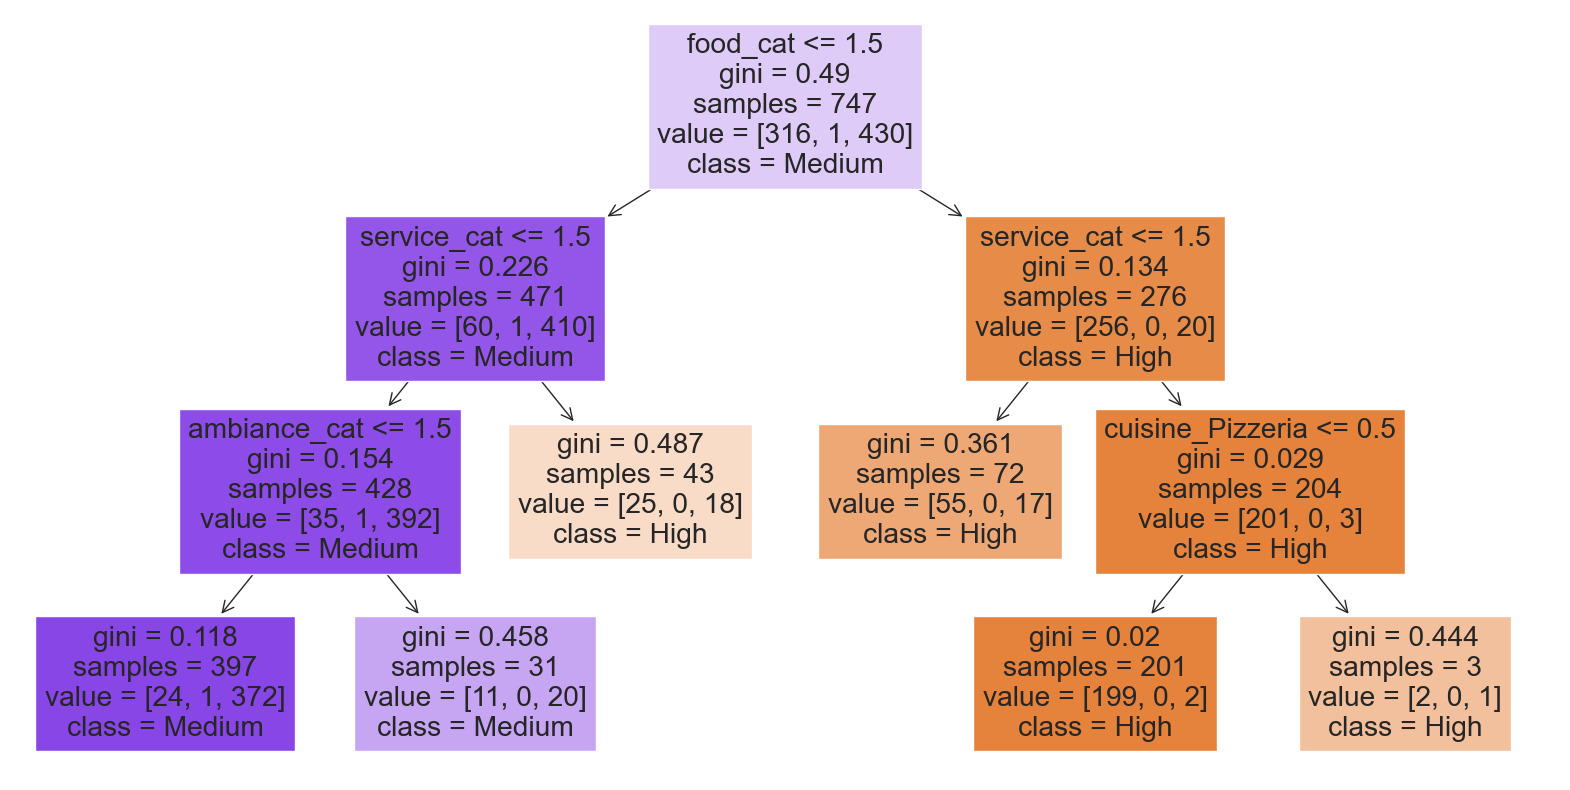

In [85]:
# Visualizing the decision tree

# Extracting feature names from the DataFrame
feature_names = df_prepared.drop(['name', 'overall_rating', 'overall_rating_category', 'food', 'service', 'ambiance'], axis=1).columns

# Check the order of the class used by the model
print("Classes as used by the model:", dt5.classes_)

# Manually specifying the class names to ensure correct order and alignment(needs to align with print(dt5.classes_))
class_names = ['High','Low', 'Medium']

# Plot the decision tree
plt.figure(figsize=(20,10))  # Set the figure size (width, height) for better readability
plot_tree(dt5, feature_names=feature_names, class_names=class_names, filled=True)

plt.savefig('dt_m5.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [86]:
# Print the decision rule

from sklearn.tree import export_text

# Assuming dt5 is your well-tuned DecisionTreeClassifier model
tree_rules = export_text(dt5, feature_names=list(X.columns))
print(tree_rules)


|--- food_cat <= 1.50
|   |--- service_cat <= 1.50
|   |   |--- ambiance_cat <= 1.50
|   |   |   |--- class: Medium
|   |   |--- ambiance_cat >  1.50
|   |   |   |--- class: Medium
|   |--- service_cat >  1.50
|   |   |--- class: High
|--- food_cat >  1.50
|   |--- service_cat <= 1.50
|   |   |--- class: High
|   |--- service_cat >  1.50
|   |   |--- cuisine_Pizzeria <= 0.50
|   |   |   |--- class: High
|   |   |--- cuisine_Pizzeria >  0.50
|   |   |   |--- class: High



In [87]:
# Check feature importances

import pandas as pd

# Getting feature importances
feature_importances = pd.Series(dt5.feature_importances_, index=X.columns).sort_values(ascending=False)

# Displaying feature importances
print(feature_importances)


food_cat                        0.880390
service_cat                     0.097585
ambiance_cat                    0.019576
cuisine_Pizzeria                0.002449
cuisine_Middle Eastern          0.000000
                                  ...   
cuisine_Brazilian Steakhouse    0.000000
cuisine_Brazilian               0.000000
cuisine_Bistro                  0.000000
cuisine_Belgian                 0.000000
cuisine_French                  0.000000
Length: 132, dtype: float64


# CRISP-DM Phase 5: Evaluation

### 1. Accuracy Scores and Classification Report

In [88]:
 # Calculating training accuracy
training_accuracy = dt5.score(X_train, y_train)
print(f"Training Accuracy: {training_accuracy:.4f}")

# Calculating testing accuracy
testing_accuracy = dt5.score(X_test, y_test)
print(f"Testing Accuracy: {testing_accuracy:.4f}")


# Classification Report
y_pred = dt5.predict(X_test)

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Training Accuracy: 0.9009
Testing Accuracy: 0.9198
Classification Report:
               precision    recall  f1-score   support

        High       0.88      0.93      0.90        76
      Medium       0.95      0.91      0.93       111

    accuracy                           0.92       187
   macro avg       0.91      0.92      0.92       187
weighted avg       0.92      0.92      0.92       187



### 2. Confusion Matrix

Confusion Matrix:
 [[ 71   5]
 [ 10 101]]


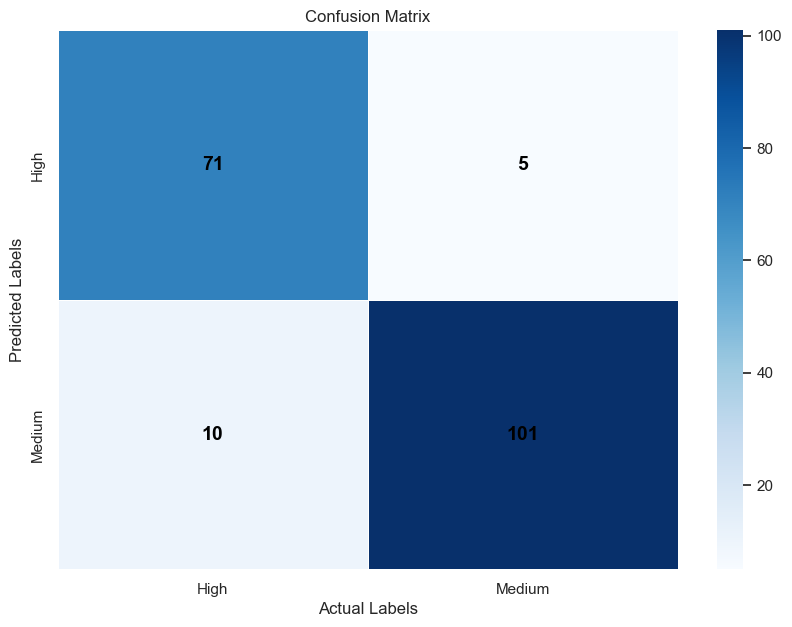

In [89]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Predictions: Ensure y_test and y_pred are consistent with multi-class setup
y_pred = dt5.predict(X_test)

# Generating the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Plotting using seaborn with manual text annotations
# Update the class label based on actual classes
cm_classes = ['High', 'Medium']  


plt.figure(figsize=(10, 7))
ax = sns.heatmap(conf_matrix, annot=False, fmt="d", linewidths=.5, cmap='Blues', 
                 xticklabels=cm_classes, yticklabels=cm_classes)

# Adding manual annotations with high contrast
for i in range(len(cm_classes)):
    for j in range(len(cm_classes)):
        text = ax.text(j + 0.5, i + 0.5, conf_matrix[i, j],
                       ha="center", va="center", color="black", 
                       fontsize=14, weight='bold')

# Adding labels and title
plt.ylabel('Predicted Labels')
plt.xlabel('Actual Labels')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


### 3. ROC Curve and AUC

Here, we use one-vs-rest (OvR) to compute ROC Curves and AUC for Each Class.

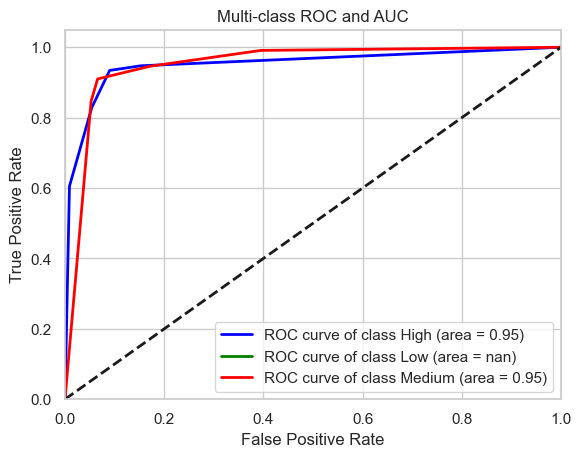

In [90]:
# Classes obtained from the model
model_classes = dt5.classes_


# Binarize y_test for multi-class ROC Curve
y_test_binarized = label_binarize(y_test, classes=model_classes)
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Predict probabilities for each class
y_prob = dt5.predict_proba(X_test)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for the multi-class problem
colors = ['blue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(model_classes[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC and AUC')
plt.legend(loc="lower right")
plt.show()

### Check the distribution of the ‘Low’ classes in the training and testing data

In [91]:
print("Training class distribution:")
print(y_train.value_counts())

print("Testing class distribution:")
print(y_test.value_counts())


Training class distribution:
overall_rating_category
Medium    430
High      316
Low         1
Name: count, dtype: int64
Testing class distribution:
overall_rating_category
Medium    111
High       76
Low         0
Name: count, dtype: int64
